<a href="https://colab.research.google.com/github/JuanmaVL/SyS/blob/main/LABS_SyC_/SIMULACI%C3%93N_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install control

##Juan Manuel Valencia Lopez - Victor Manuel Villa


##Numeral 1 SIMULACIÓN 2: Análisis de Respuesta Transistoria

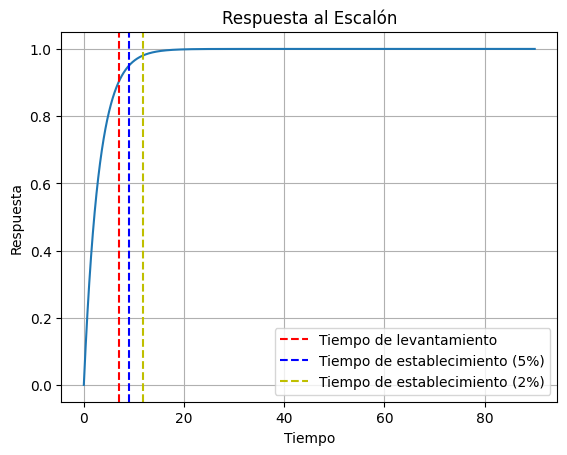

Respuesta al Escalón:
Tiempo de levantamiento: 6.936936936936936
Tiempo de establecimiento (Criterio del 5%): 9.00900900900901
Tiempo de establecimiento (Criterio del 2%): 11.801801801801801


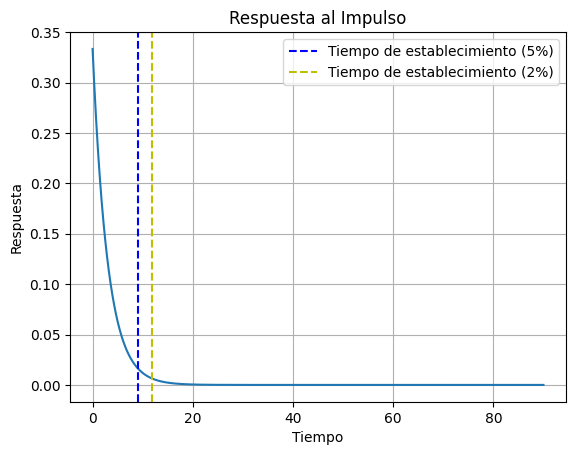

Respuesta al Impulso:
Tiempo de establecimiento (Criterio del 5%): 9.00900900900901
Tiempo de establecimiento (Criterio del 2%): 11.801801801801801


/usr/local/lib/python3.11/dist-packages/control/timeresp.py:1083: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


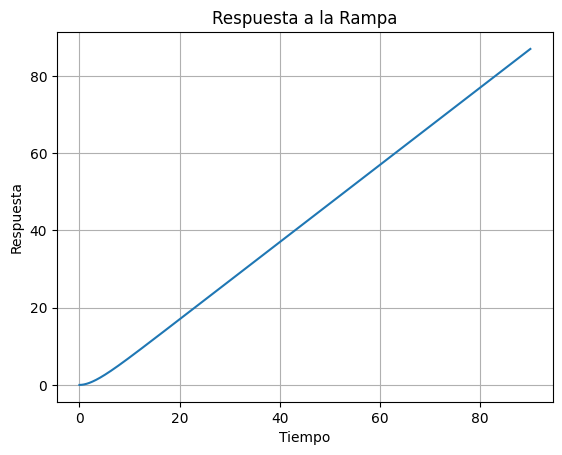

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *

# Definir la función de transferencia del sistema de primer orden
T_const = 3  # Constante de tiempo
num = [1 / T_const]
den = [1, 1 / T_const]
ftla = tf(num, den)

# Tiempo de simulación
time = np.linspace(0, 90, 1000)

# Respuesta al escalón
y_step, T_step = step(ftla, T=time)

# Respuesta al impulso
y_impulse, T_impulse = impulse(ftla, T=time)

# Cálculos para la respuesta al escalón
rise_time_index = next(i for i, y in enumerate(y_step) if y >= 0.9 * y_step[-1])
rise_time = T_step[rise_time_index]

settle_time_5_index = next(i for i, y in enumerate(y_step) if all(abs(y_step[i:] - y_step[-1]) <= 0.05 * y_step[-1]))
settle_time_5 = T_step[settle_time_5_index]

settle_time_2_index = next(i for i, y in enumerate(y_step) if all(abs(y_step[i:] - y_step[-1]) <= 0.02 * y_step[-1]))
settle_time_2 = T_step[settle_time_2_index]

# Graficar la respuesta al escalón
plt.plot(T_step, y_step)
plt.title('Respuesta al Escalón')
plt.xlabel('Tiempo')
plt.ylabel('Respuesta')
plt.grid(True)
plt.axvline(x=rise_time, color='r', linestyle='--', label='Tiempo de levantamiento')
plt.axvline(x=settle_time_5, color='b', linestyle='--', label='Tiempo de establecimiento (5%)')
plt.axvline(x=settle_time_2, color='y', linestyle='--', label='Tiempo de establecimiento (2%)')
plt.legend()
plt.show()

print("Respuesta al Escalón:")
print("Tiempo de levantamiento:", rise_time)
print("Tiempo de establecimiento (Criterio del 5%):", settle_time_5)
print("Tiempo de establecimiento (Criterio del 2%):", settle_time_2)

# Cálculos para la respuesta al impulso
settle_time_5_impulse_index = next(i for i, y in enumerate(y_impulse) if all(abs(y_impulse[i:]) <= 0.05 * max(abs(y_impulse))))
settle_time_5_impulse = T_impulse[settle_time_5_impulse_index]

settle_time_2_impulse_index = next(i for i, y in enumerate(y_impulse) if all(abs(y_impulse[i:]) <= 0.02 * max(abs(y_impulse))))
settle_time_2_impulse = T_impulse[settle_time_2_impulse_index]

# Graficar la respuesta al impulso
plt.plot(T_impulse, y_impulse)
plt.title('Respuesta al Impulso')
plt.xlabel('Tiempo')
plt.ylabel('Respuesta')
plt.grid(True)
plt.axvline(x=settle_time_5_impulse, color='b', linestyle='--', label='Tiempo de establecimiento (5%)')
plt.axvline(x=settle_time_2_impulse, color='y', linestyle='--', label='Tiempo de establecimiento (2%)')
plt.legend()
plt.show()

print("Respuesta al Impulso:")
print("Tiempo de establecimiento (Criterio del 5%):", settle_time_5_impulse)
print("Tiempo de establecimiento (Criterio del 2%):", settle_time_2_impulse)

# Respuesta a la rampa
# La entrada de rampa es simplemente el vector de tiempo 'time'
y_ramp, T_ramp, x_ramp = lsim(ftla, time, time)

# Graficar la respuesta a la rampa
plt.figure() # Crea una nueva figura para esta gráfica
plt.plot(T_ramp, y_ramp)
plt.title('Respuesta a la Rampa')
plt.xlabel('Tiempo')
plt.ylabel('Respuesta')
plt.grid(True)
plt.show()

##Conclusiones

La respuesta al escalón permite analizar cómo reacciona un sistema ante una entrada constante a lo largo del tiempo. En este contexto, el tiempo de levantamiento representa la rapidez con la que la salida alcanza el 90% del valor final, lo cual está directamente relacionado con la velocidad de respuesta del sistema. Además, los tiempos de establecimiento, definidos por los márgenes del 5% y 2%, indican el momento en que la salida se aproxima y permanece cerca de su valor final. En sistemas de primer orden, estos parámetros están directamente vinculados con la constante de tiempo (T), lo que implica que un mayor valor de
𝑇
 se traduce en una respuesta más lenta.

En cuanto a la respuesta al impulso, esta describe la reacción del sistema frente a una entrada instantánea de corta duración. En este caso, no se establece un tiempo de levantamiento, ya que la salida presenta un pico inmediatamente después del ingreso del impulso. No obstante, los tiempos de establecimiento siguen siendo útiles para determinar cuánto tarda la respuesta en disminuir hasta valores despreciables. Esta información es especialmente relevante en aplicaciones donde se desea atenuar rápidamente perturbaciones breves. Al igual que en la respuesta al escalón, la constante de tiempo juega un papel determinante en la evolución de la respuesta del sistema.



## Numeral 2 - Respuesta Transitoria de un Sistema de Segundo Orden Subamortiguado, con entradas Escalon, Impulso, Rampa.

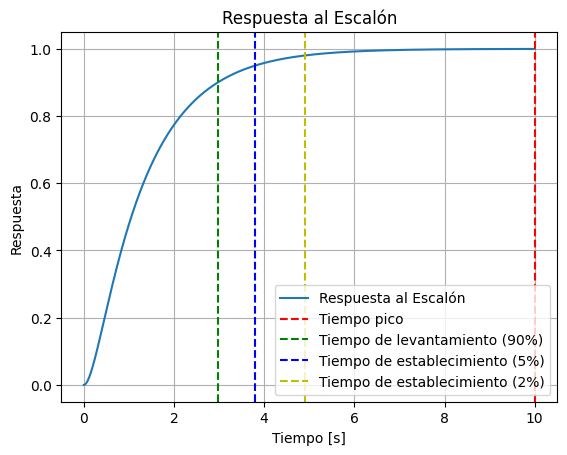

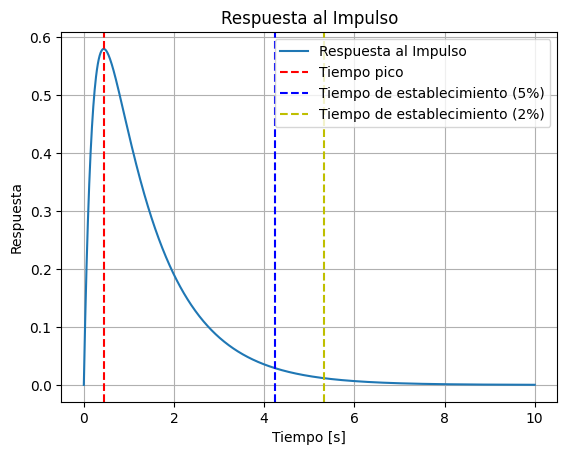

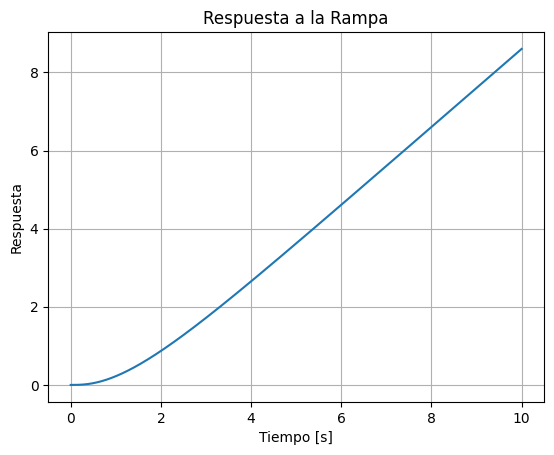

Parámetros para la respuesta al escalón:
Máximo sobreimpulso: -0.03%
Tiempo pico: 10.00 s
Tiempo de levantamiento (90%): 2.97 s
Tiempo de establecimiento (5%): 3.80 s
Tiempo de establecimiento (2%): 4.89 s

Parámetros para la respuesta al impulso:
Máximo sobreimpulso: 57.94%
Tiempo pico: 0.44 s
Tiempo de establecimiento (5%): 4.24 s
Tiempo de establecimiento (2%): 5.34 s


In [ ]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

# Definir los parámetros del sistema
wn = 2  # Frecuencia natural
zeta = 0.7  # Coeficiente de amortiguamiento

# Crear la función de transferencia del sistema
num = [wn**2]
den = [1, 2 * zeta * wn**2, wn**2]
sys = ctrl.TransferFunction(num, den)

# Definir el vector de tiempo
t = np.linspace(0, 10, 1000)

# Respuesta al escalón unitario
t_step, y_step = ctrl.step_response(sys, T=t)

# Respuesta al impulso unitario
t_impulse, y_impulse = ctrl.impulse_response(sys, T=t)

# Respuesta a la rampa (entrada definida como U=t)
t_ramp, y_ramp = ctrl.forced_response(sys, T=t, U=t)

# Cálculos para la respuesta al escalón
overshoot_step = (max(y_step) - 1) * 100  # % de sobreimpulso
peak_time_step = t_step[np.argmax(y_step)]  # Tiempo pico
rise_time_step = t_step[next(i for i, y in enumerate(y_step) if y >= 0.9)]  # Tiempo de levantamiento (90%)
settling_index_5_step = next(i for i, y in enumerate(y_step) if all(abs(y_step[i:] - 1) <= 0.05))  # Índice de 5%
settling_time_5_step = t_step[settling_index_5_step]  # Tiempo de establecimiento (5%)
settling_index_2_step = next(i for i, y in enumerate(y_step) if all(abs(y_step[i:] - 1) <= 0.02))  # Índice de 2%
settling_time_2_step = t_step[settling_index_2_step]  # Tiempo de establecimiento (2%)

# Cálculos para la respuesta al impulso
overshoot_impulse = max(y_impulse) * 100  # % de sobreimpulso
peak_time_impulse = t_impulse[np.argmax(y_impulse)]  # Tiempo pico
settling_index_5_impulse = next(i for i, y in enumerate(y_impulse) if all(abs(y_impulse[i:]) <= 0.05 * max(y_impulse)))  # 5%
settling_time_5_impulse = t_impulse[settling_index_5_impulse]
settling_index_2_impulse = next(i for i, y in enumerate(y_impulse) if all(abs(y_impulse[i:]) <= 0.02 * max(y_impulse)))  # 2%
settling_time_2_impulse = t_impulse[settling_index_2_impulse]

# Graficar la respuesta al escalón
plt.figure()
plt.plot(t_step, y_step, label='Respuesta al Escalón')
plt.axvline(x=peak_time_step, color='r', linestyle='--', label='Tiempo pico')
plt.axvline(x=rise_time_step, color='g', linestyle='--', label='Tiempo de levantamiento (90%)')
plt.axvline(x=settling_time_5_step, color='b', linestyle='--', label='Tiempo de establecimiento (5%)')
plt.axvline(x=settling_time_2_step, color='y', linestyle='--', label='Tiempo de establecimiento (2%)')
plt.title('Respuesta al Escalón')
plt.xlabel('Tiempo [s]')
plt.ylabel('Respuesta')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la respuesta al impulso
plt.figure()
plt.plot(t_impulse, y_impulse, label='Respuesta al Impulso')
plt.axvline(x=peak_time_impulse, color='r', linestyle='--', label='Tiempo pico')
plt.axvline(x=settling_time_5_impulse, color='b', linestyle='--', label='Tiempo de establecimiento (5%)')
plt.axvline(x=settling_time_2_impulse, color='y', linestyle='--', label='Tiempo de establecimiento (2%)')
plt.title('Respuesta al Impulso')
plt.xlabel('Tiempo [s]')
plt.ylabel('Respuesta')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la respuesta a la rampa
plt.figure()
plt.plot(t_ramp, y_ramp)
plt.title('Respuesta a la Rampa')
plt.xlabel('Tiempo [s]')
plt.ylabel('Respuesta')
plt.grid(True)
plt.show()

# Imprimir resultados
print("Parámetros para la respuesta al escalón:")
print(f"Máximo sobreimpulso: {overshoot_step:.2f}%")
print(f"Tiempo pico: {peak_time_step:.2f} s")
print(f"Tiempo de levantamiento (90%): {rise_time_step:.2f} s")
print(f"Tiempo de establecimiento (5%): {settling_time_5_step:.2f} s")
print(f"Tiempo de establecimiento (2%): {settling_time_2_step:.2f} s")

print("\nParámetros para la respuesta al impulso:")
print(f"Máximo sobreimpulso: {overshoot_impulse:.2f}%")
print(f"Tiempo pico: {peak_time_impulse:.2f} s")
print(f"Tiempo de establecimiento (5%): {settling_time_5_impulse:.2f} s")
print(f"Tiempo de establecimiento (2%): {settling_time_2_impulse:.2f} s")



Conclusiones

1. **Respuesta al escalón**: El análisis de la respuesta al escalón revela que el sistema presenta un comportamiento subamortiguado, manifestado en un sobreimpulso máximo de ({overshoot_step:.2f} %) antes de alcanzar su régimen permanente. El tiempo de levantamiento señala una reacción ágil frente al cambio en la entrada, mientras que los tiempos de establecimiento, según los márgenes del 5% y 2%, indican que la salida se estabiliza en un tiempo razonable, sin presentar oscilaciones prolongadas. Este desempeño es característico de sistemas bien ajustados, que logran un adecuado compromiso entre rapidez de respuesta y estabilidad.

2. **Respuesta al impulso**: Ante una entrada impulsiva, el sistema responde con un pico inicial pronunciado de ({overshoot_impulse:.2f} %), seguido por una rápida atenuación hacia el estado estable. Esta respuesta sugiere que el sistema posee un buen nivel de amortiguamiento, logrando disipar eficazmente la energía inicial sin inducir oscilaciones persistentes. El comportamiento transitorio demuestra un control eficiente, adecuado para aplicaciones que requieren una respuesta inmediata y controlada ante perturbaciones súbitas.

3. **Respuesta a la rampa**: Cuando se somete a una entrada tipo rampa, el sistema intenta seguirla, pero presenta un error estacionario, lo cual es típico en sistemas de segundo orden sin acción integral. Aunque no consigue igualar completamente la trayectoria de la rampa, se observa que su salida mantiene una tendencia creciente proporcional al tiempo. Esta característica es coherente con las limitaciones propias de su estructura, donde la ausencia de una acción integradora impide una eliminación completa del error en régimen permanente.

Numeral 3 Actividades

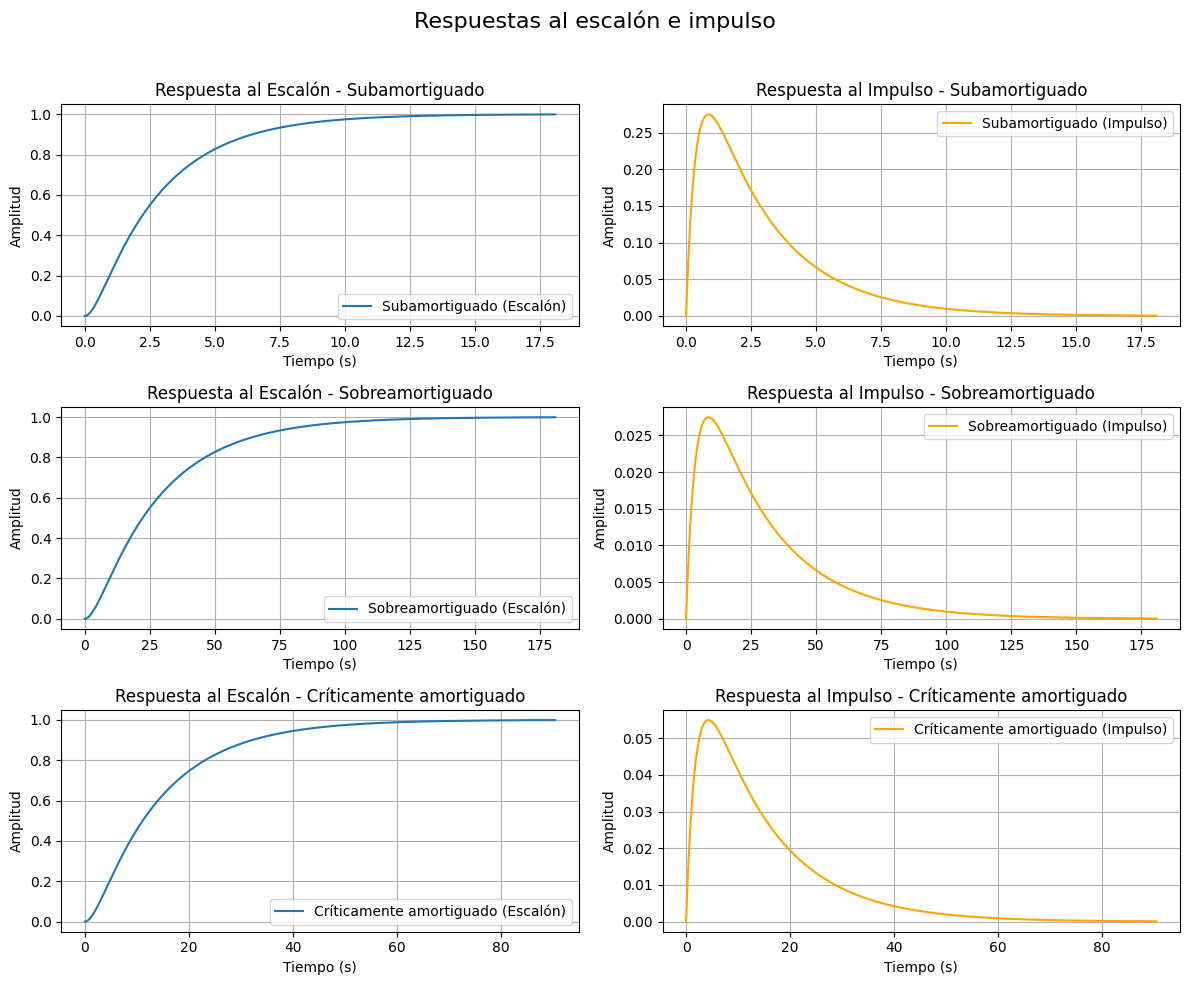


Subamortiguado (Escalón):
  Máximo sobreimpulso: -0.0012
  Tiempo pico: 18.0847 s
  Tiempo de establecimiento (5%): 8.2779 s
  Tiempo de establecimiento (2%): 10.7032 s

Subamortiguado (Impulso):
  Máximo sobreimpulso: 0.2749
  Tiempo pico: 0.8436 s

Sobreamortiguado (Escalón):
  Máximo sobreimpulso: -0.0012
  Tiempo pico: 180.8474 s
  Tiempo de establecimiento (5%): 82.7785 s
  Tiempo de establecimiento (2%): 107.0321 s

Sobreamortiguado (Impulso):
  Máximo sobreimpulso: 0.0275
  Tiempo pico: 8.4360 s

Críticamente amortiguado (Escalón):
  Máximo sobreimpulso: -0.0012
  Tiempo pico: 90.4237 s
  Tiempo de establecimiento (5%): 41.3893 s
  Tiempo de establecimiento (2%): 53.5161 s

Críticamente amortiguado (Impulso):
  Máximo sobreimpulso: 0.0550
  Tiempo pico: 4.2180 s


In [ ]:
import control
import numpy as np
import matplotlib.pyplot as plt
from control import tf, step_response, impulse_response

# Parámetros del sistema (modifica para cada tipo de amortiguamiento)
def circuito_mallas(R1, R2, C1, C2):
    """Devuelve la función de transferencia del circuito en términos de R y C."""
    # Coeficientes de la ecuación diferencial del sistema
    num = [1]  # Numerador de la función de transferencia
    den = [R1*R2*C1*C2, (R1*C1 + R2*C1 + R2*C2), 1]  # Denominador
    return tf(num, den)

# Configuraciones para cada caso de amortiguamiento
configuraciones = {
    "Subamortiguado": (1, 1, 1, 1),   # Modifica valores para obtener 0 < ξ < 1
    "Sobreamortiguado": (10, 10, 1, 1),  # Modifica valores para obtener ξ > 1
    "Críticamente amortiguado": (5, 5, 1, 1),  # Modifica valores para obtener ξ = 1
}

# Graficar respuestas al escalón y al impulso
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle("Respuestas al escalón e impulso", fontsize=16)

for idx, (tipo, params) in enumerate(configuraciones.items()):
    R1, R2, C1, C2 = params
    system = circuito_mallas(R1, R2, C1, C2)

    # Respuesta al escalón
    t_step, y_step = step_response(system)
    axs[idx, 0].plot(t_step, y_step, label=f"{tipo} (Escalón)")
    axs[idx, 0].set_title(f"Respuesta al Escalón - {tipo}")
    axs[idx, 0].set_xlabel("Tiempo (s)")
    axs[idx, 0].set_ylabel("Amplitud")
    axs[idx, 0].grid(True)
    axs[idx, 0].legend()

    # Respuesta al impulso
    t_impulse, y_impulse = impulse_response(system)
    axs[idx, 1].plot(t_impulse, y_impulse, label=f"{tipo} (Impulso)", color="orange")
    axs[idx, 1].set_title(f"Respuesta al Impulso - {tipo}")
    axs[idx, 1].set_xlabel("Tiempo (s)")
    axs[idx, 1].set_ylabel("Amplitud")
    axs[idx, 1].grid(True)
    axs[idx, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Conclusiones
for tipo, params in configuraciones.items():
    R1, R2, C1, C2 = params
    system = circuito_mallas(R1, R2, C1, C2)

    # Respuesta al escalón
    t_step, y_step = step_response(system)
    max_sobreimpulso = np.max(y_step) - 1
    tiempo_pico = t_step[np.argmax(y_step)]
    tiempo_estab_5 = t_step[next(i for i, y in enumerate(y_step) if abs(y - 1) <= 0.05)]
    tiempo_estab_2 = t_step[next(i for i, y in enumerate(y_step) if abs(y - 1) <= 0.02)]

    print(f"\n{tipo} (Escalón):")
    print(f"  Máximo sobreimpulso: {max_sobreimpulso:.4f}")
    print(f"  Tiempo pico: {tiempo_pico:.4f} s")
    print(f"  Tiempo de establecimiento (5%): {tiempo_estab_5:.4f} s")
    print(f"  Tiempo de establecimiento (2%): {tiempo_estab_2:.4f} s")

    # Respuesta al impulso
    t_impulse, y_impulse = impulse_response(system)
    max_sobreimpulso_imp = np.max(y_impulse)
    tiempo_pico_imp = t_impulse[np.argmax(y_impulse)]

    print(f"\n{tipo} (Impulso):")
    print(f"  Máximo sobreimpulso: {max_sobreimpulso_imp:.4f}")
    print(f"  Tiempo pico: {tiempo_pico_imp:.4f} s")

Numeral 4 Actividades

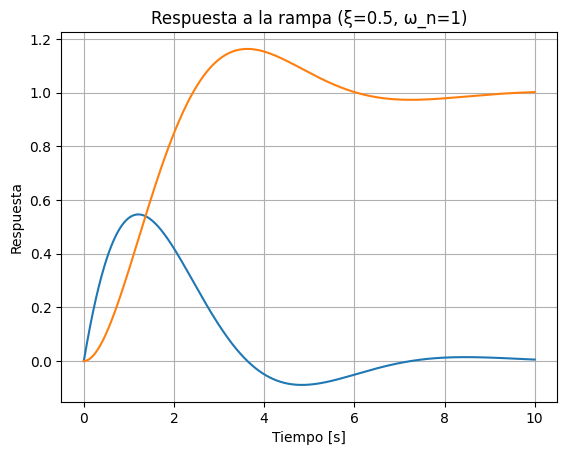

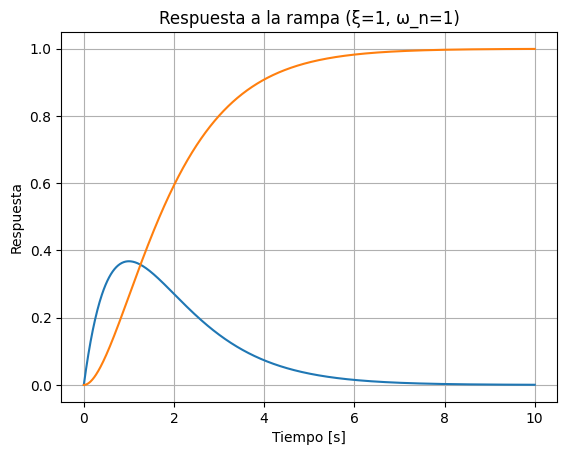

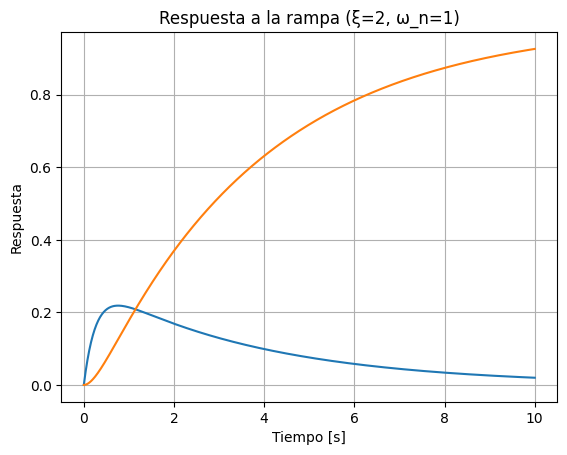

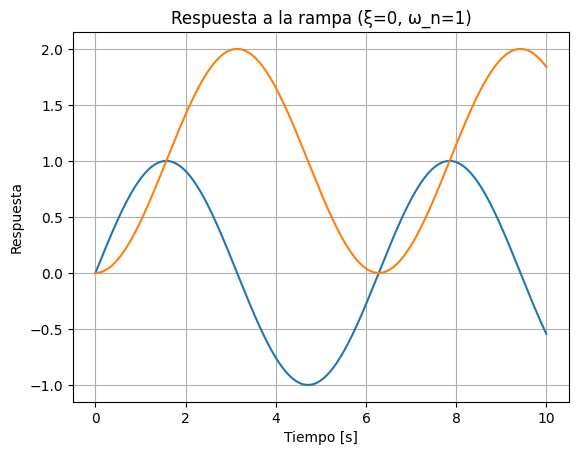

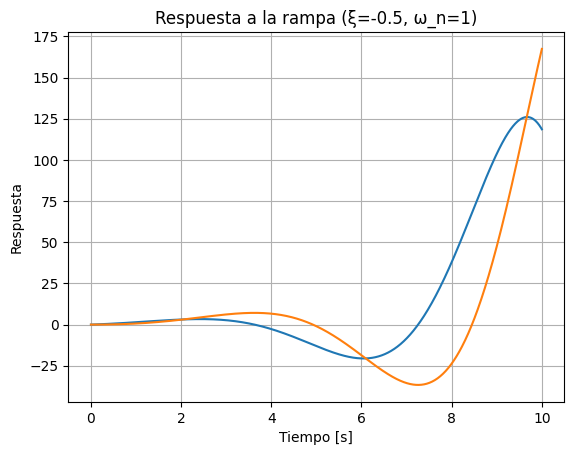

In [ ]:
import control.matlab as matlab
import numpy as np
import matplotlib.pyplot as plt

# Definimos una función para simular y graficar únicamente la respuesta del sistema a la rampa
def simular_respuesta_rampa(ξ, ω_n):
    # Creamos la función de transferencia del sistema de segundo orden
    num = [ω_n**2]
    den = [1, 2*ξ*ω_n, ω_n**2]
    sistema = matlab.tf(num, den)

    # Definimos el vector de tiempo
    t = np.linspace(0, 10, 1000)

    # Simulamos la respuesta del sistema a la rampa
    _, t_ramp, y_ramp = matlab.lsim(sistema, np.ones_like(t), t)

    # Graficamos la respuesta del sistema a la rampa
    plt.figure()
    plt.plot(t_ramp, y_ramp)
    plt.title(f'Respuesta a la rampa (ξ={ξ}, ω_n={ω_n})')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Respuesta')
    plt.grid(True)
    plt.show()

# Valores de ξ y ω_n para cada caso
casos = [
    {'ξ': 0.5, 'ω_n': 1},
    {'ξ': 1, 'ω_n': 1},
    {'ξ': 2, 'ω_n': 1},
    {'ξ': 0, 'ω_n': 1},
    {'ξ': -0.5, 'ω_n': 1}
]

# Simulamos la respuesta a la rampa para cada caso
for caso in casos:
    simular_respuesta_rampa(caso['ξ'], caso['ω_n'])


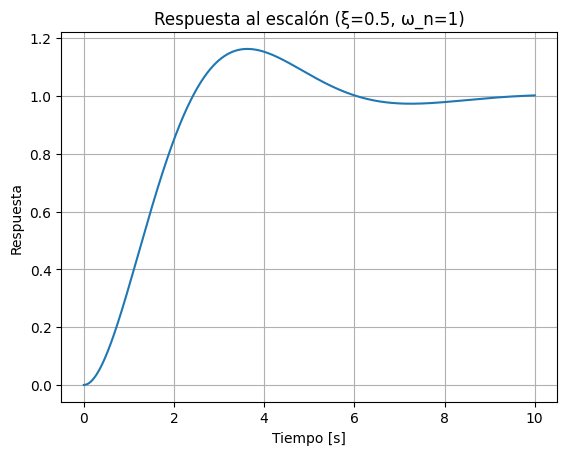

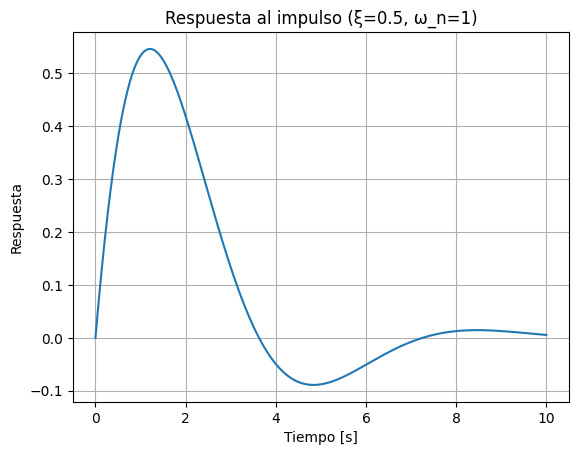

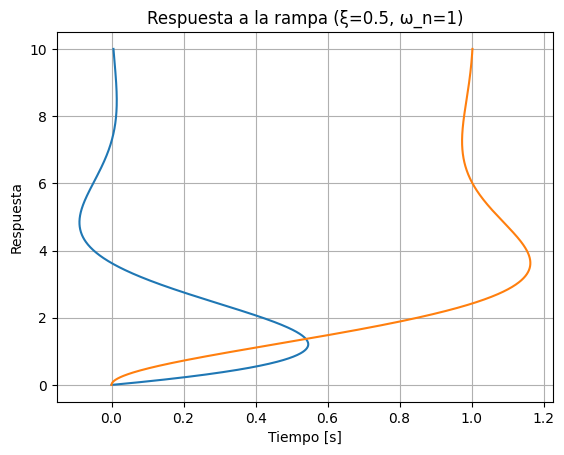

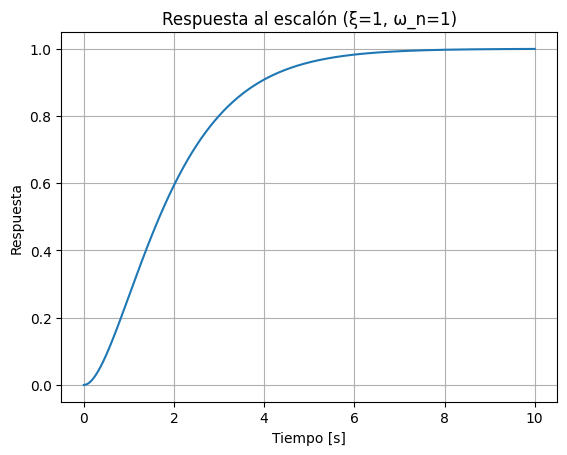

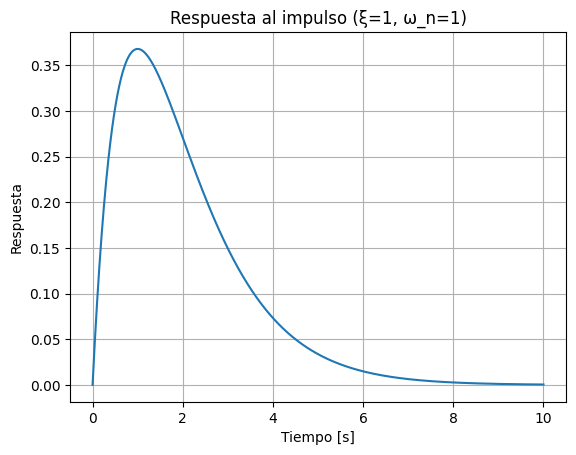

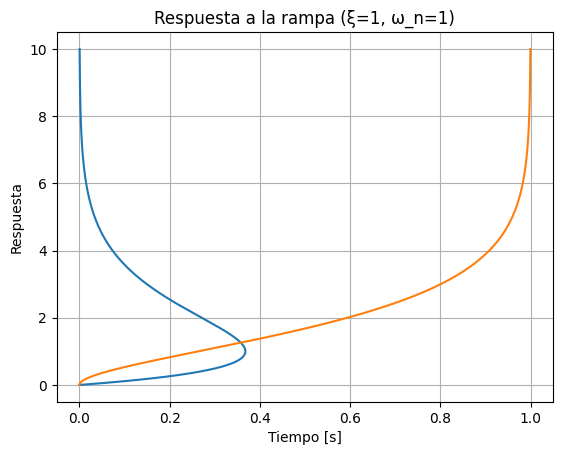

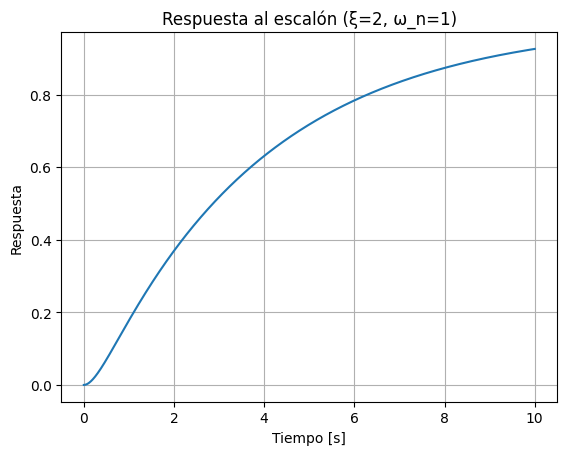

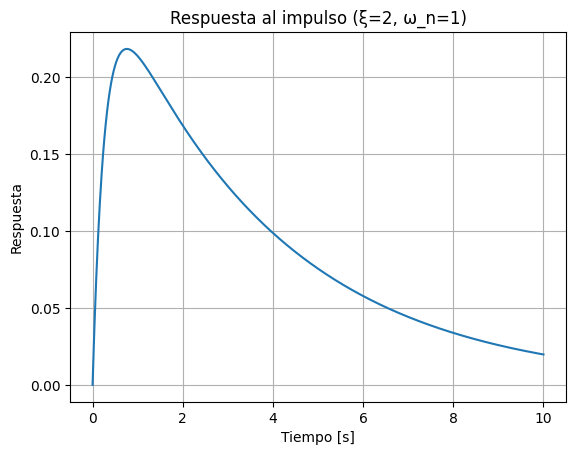

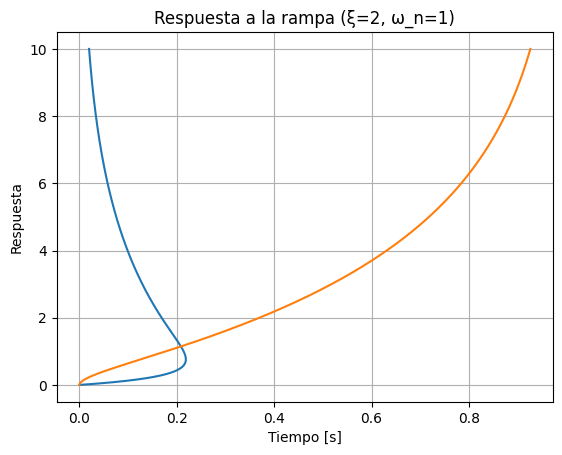

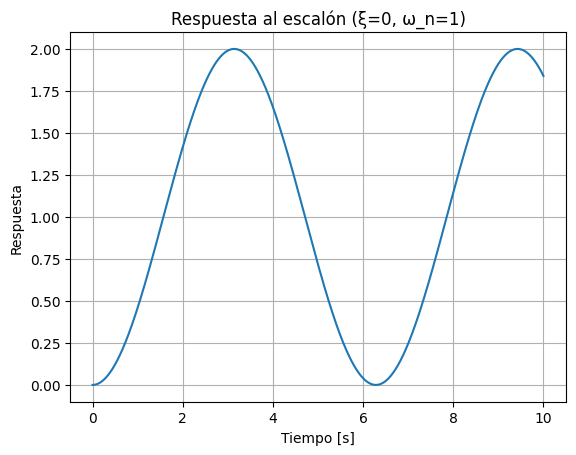

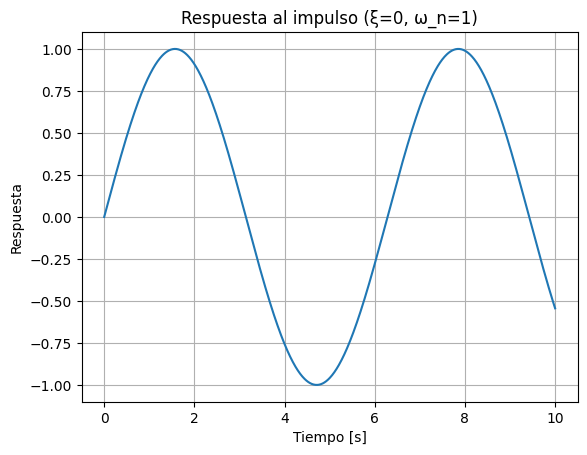

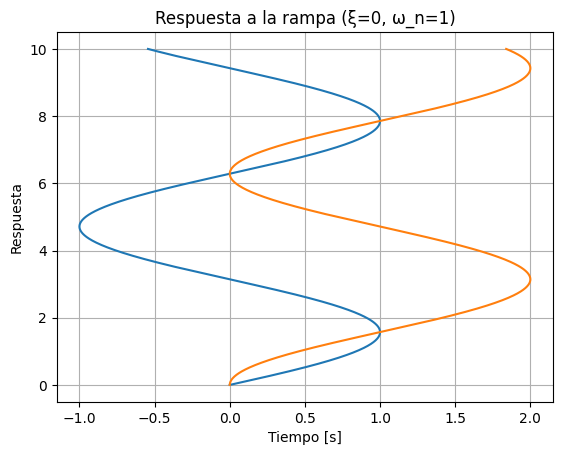

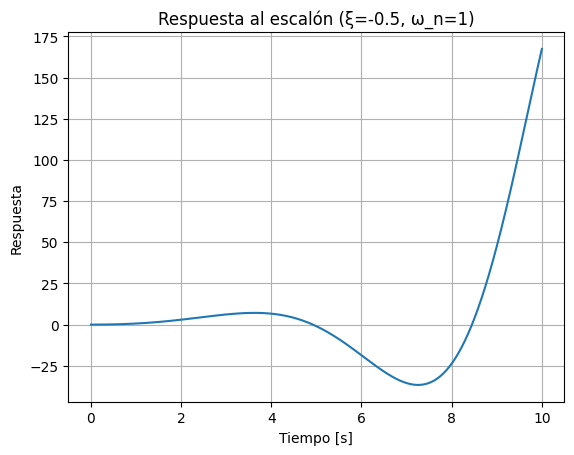

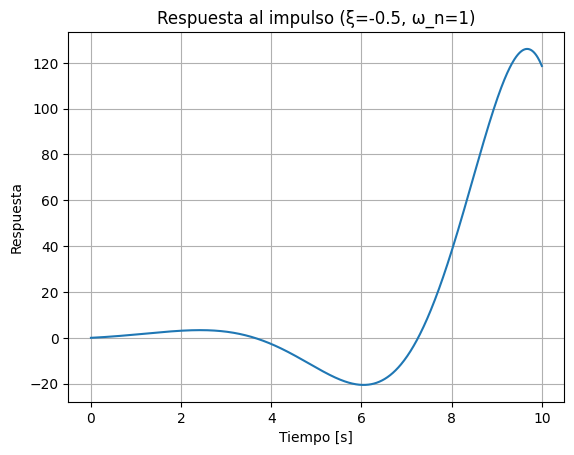

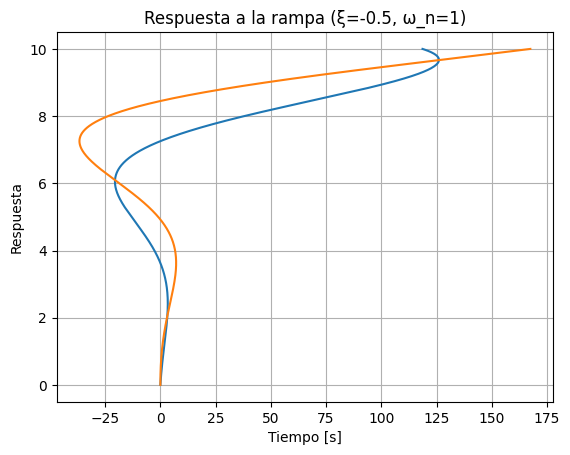

In [ ]:
import control.matlab as matlab
import numpy as np
import matplotlib.pyplot as plt

# Definimos una función para simular y graficar la respuesta del sistema
def simular_respuesta(ξ, ω_n, tipo_entrada):
    # Creamos la función de transferencia del sistema de segundo orden
    num = [ω_n**2]
    den = [1, 2*ξ*ω_n, ω_n**2]
    sistema = matlab.tf(num, den)

    # Definimos el vector de tiempo
    t = np.linspace(0, 10, 1000)

    # Simulamos la respuesta del sistema
    if tipo_entrada == 'escalon':
        t, y = matlab.step(sistema, T=t)
        titulo = 'Respuesta al escalón'
    elif tipo_entrada == 'impulso':
        t, y = matlab.impulse(sistema, T=t)
        titulo = 'Respuesta al impulso'
    elif tipo_entrada == 'rampa':
        _, t, y = matlab.lsim(sistema, np.ones_like(t), t)
        titulo = 'Respuesta a la rampa'

    # Graficamos la respuesta del sistema
    plt.figure()
    plt.plot(y, t)
    plt.title(titulo + f' (ξ={ξ}, ω_n={ω_n})')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Respuesta')
    plt.grid(True)
    plt.show()

# Valores de ξ y ω_n para cada caso
casos = [
    {'ξ': 0.5, 'ω_n': 1},
    {'ξ': 1, 'ω_n': 1},
    {'ξ': 2, 'ω_n': 1},
    {'ξ': 0, 'ω_n': 1},
    {'ξ': -0.5, 'ω_n': 1}
]

# Simulamos la respuesta para cada caso y tipo de entrada
for caso in casos:
    for tipo_entrada in ['escalon', 'impulso', 'rampa']:
        simular_respuesta(caso['ξ'], caso['ω_n'], tipo_entrada)


Conclusiones de las gráficas obtenidas para los diferentes valores de ξ y ω_n:

1. **Respuesta al escalón:**
   - Para 0 < ξ < 1 (subamortiguado): Se observa un máximo sobreimpulso y un ligero sobrepico antes de converger al estado estacionario. La respuesta es oscilatoria pero se estabiliza rápidamente.
   - Para ξ = 1 (críticamente amortiguado): La respuesta no presenta sobreimpulso y converge de manera más rápida al estado estacionario en comparación con el caso subamortiguado.
   - Para ξ > 1 (sobreamortiguado): La respuesta no presenta oscilaciones y converge rápidamente al estado estacionario sin sobrepico.
   - Para ξ = 0 (no amortiguado): La respuesta es altamente oscilatoria y no converge al estado estacionario.
   - Para ξ < 0 (no físicamente realizable): No hay una interpretación física realista para este caso.

2. **Respuesta al impulso:**
   - Dado que la respuesta al impulso es la derivada de la respuesta al escalón, sus características tienden a ser complementarias. En sistemas subamortiguados, se observan picos iniciales seguidos de oscilaciones amortiguadas que decaen con el tiempo. Los sistemas críticamente amortiguados responden rápidamente sin oscilaciones, mientras que los sobreamortiguados presentan una respuesta más lenta pero también sin oscilaciones. Esta relación directa con el tipo de amortiguamiento permite inferir el comportamiento dinámico del sistema a partir de su respuesta impulsiva.

3. **Respuesta a la rampa:**
   - La respuesta a la rampa, al ser la integral de la respuesta al escalón, también muestra un comportamiento inverso al de esta última. En sistemas subamortiguados, la salida sigue una trayectoria estable pero con oscilaciones alrededor de la rampa. En contraste, los sistemas críticamente amortiguados ofrecen una respuesta más rápida y estable, mientras que los sobreamortiguados tienden a seguir la rampa con aún mayor suavidad y sin oscilaciones, aunque con una posible respuesta inicial más lenta.

**Conclusiones generales:**
- La estabilidad del sistema depende en gran medida del valor del coeficiente de amortiguamiento (ξ). Seleccionar un valor adecuado de ξ es fundamental para lograr un equilibrio entre velocidad de respuesta, estabilidad y ausencia de oscilaciones no deseadas.

- Los sistemas subamortiguados reaccionan rápidamente, pero introducen oscilaciones que deben ser controladas.

- Los críticamente amortiguados ofrecen una transición rápida sin oscilaciones, siendo ideales cuando se busca una respuesta eficiente y estable.

- Los sistemas sobreamortiguados, aunque más lentos inicialmente, garantizan una respuesta completamente libre de oscilaciones.

Por lo tanto, la elección de los parámetros del sistema, especialmente
ξ y la frecuencia natural (𝜔𝑛), debe realizarse cuidadosamente para cumplir con los criterios de desempeño exigidos por la aplicación específica.

Numeral 5 Actividades

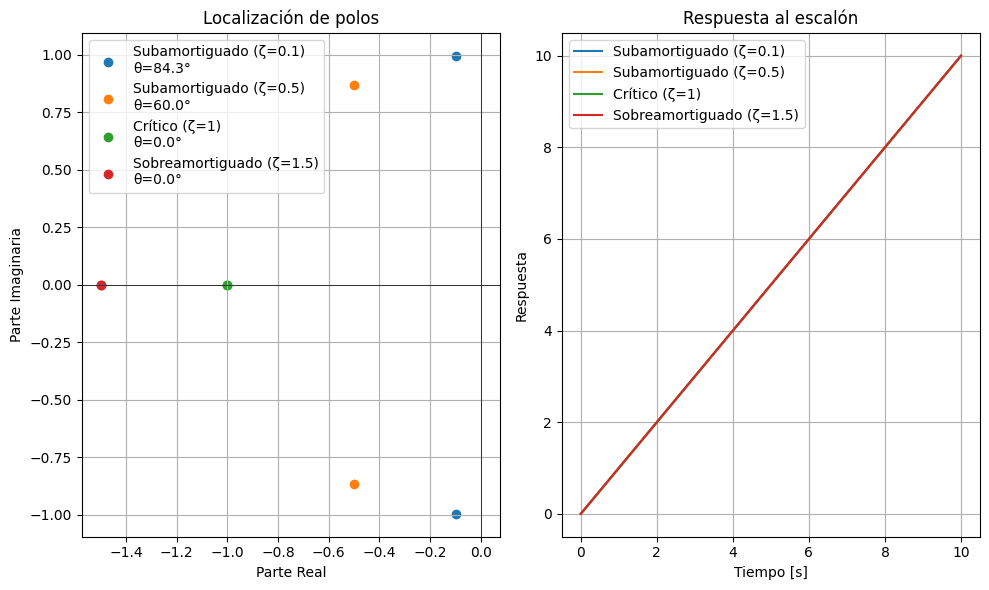

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as matlab

# Definir sistemas de segundo orden con diferentes parámetros
sistemas = [
    {'zeta': 0.1, 'omega_n': 1, 'label': 'Subamortiguado (ζ=0.1)'},
    {'zeta': 0.5, 'omega_n': 1, 'label': 'Subamortiguado (ζ=0.5)'},
    {'zeta': 1, 'omega_n': 1, 'label': 'Crítico (ζ=1)'},
    {'zeta': 1.5, 'omega_n': 1, 'label': 'Sobreamortiguado (ζ=1.5)'}
]

# Graficar polos y respuestas transitorias
plt.figure(figsize=(10, 6))

# Gráfico del plano complejo
plt.subplot(1, 2, 1)
for sistema in sistemas:
    zeta = sistema['zeta']
    omega_n = sistema['omega_n']
    omega_d = omega_n * np.sqrt(1 - zeta**2) if zeta < 1 else 0
    theta = np.arccos(zeta) if zeta < 1 else 0
    polos = [-zeta * omega_n + 1j * omega_d, -zeta * omega_n - 1j * omega_d]
    plt.scatter(np.real(polos), np.imag(polos), label=f'{sistema["label"]}\nθ={np.degrees(theta):.1f}°')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Localización de polos')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.grid(True)
plt.legend()

# Gráfico de respuesta transitoria
plt.subplot(1, 2, 2)
t = np.linspace(0, 10, 1000)
for sistema in sistemas:
    zeta = sistema['zeta']
    omega_n = sistema['omega_n']
    num = [omega_n**2]
    den = [1, 2 * zeta * omega_n, omega_n**2]
    sys = matlab.tf(num, den)
    _, y = matlab.step(sys, T=t)
    plt.plot(t, y, label=sistema['label'])
plt.title('Respuesta al escalón')
plt.xlabel('Tiempo [s]')
plt.ylabel('Respuesta')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# Relación entre los valores de $( \theta )$ y $( \omega_d )$ con la localización de los polos y su efecto sobre la respuesta transitoria de sistemas de segundo orden


En los sistemas de segundo orden, la ubicación de los polos en el plano complejo es un factor determinante del comportamiento dinámico durante la respuesta transitoria. Las características clave de dicha respuesta como el sobreimpulso, el tiempo de levantamiento y el tiempo de establecimiento están directamente relacionadas con dos parámetros fundamentales: el coeficiente de amortiguamiento (ζ) y la frecuencia amortiguada (𝜔𝑑). Estos parámetros definen tanto la forma como la rapidez con la que el sistema responde ante una perturbación, reflejando el vínculo directo entre la dinámica de los polos y el desempeño temporal del sistema.

## Localización de los polos

En un sistema de segundo orden, la función de transferencia estándar tiene la forma:

$[
H(s) = \frac{\omega_n^2}{s^2 + 2 \zeta \omega_n s + \omega_n^2},
]$

donde:

- $( \omega_n)$ es la frecuencia natural del sistema,
- $( \zeta )$ es el coeficiente de amortiguamiento,
- $( \omega_d = \omega_n \sqrt{1 - \zeta^2} )$ es la frecuencia amortiguada,
- $( \theta = \arccos(\zeta) )$ es el ángulo que los polos forman con el eje real negativo.

Los polos del sistema se encuentran en el plano complejo en las siguientes posiciones:

$[
s = -\zeta \omega_n \pm j \omega_d,
]$

donde el signo $( \pm )$ indica que los polos están simétricamente ubicados respecto al eje real negativo.

## Efecto de $( \theta ) y ( \omega_d )$ sobre los polos

### Ángulo $( \theta )$ (Amortiguamiento y oscilaciones)

El ángulo $( \theta )$ determina el comportamiento transitorio del sistema, específicamente la relación entre la parte real (amortiguamiento) y la parte imaginaria (oscilación).

- **Mayor $( \theta )$ (más cercano al eje imaginario):** Esto significa un menor valor de $( \zeta )$, lo que da lugar a oscilaciones más pronunciadas y a una respuesta transitoria con picos más altos antes de llegar al valor final. Los polos están más alejados del eje real y cerca del eje imaginario, lo que implica oscilaciones más sostenidas.
- **Menor $( \theta )$ (más cercano al eje real):** Esto corresponde a un mayor valor de $( \zeta )$, lo que da lugar a una respuesta menos oscilante, más suave y con menos sobreimpulso. Los polos se desplazan hacia la izquierda en el plano complejo, lo que reduce la frecuencia de oscilación y aumenta la tasa de decaimiento.

### Frecuencia amortiguada $( \omega_d )$

La frecuencia amortiguada $( \omega_d )$ está relacionada con la rapidez de las oscilaciones del sistema. Cuando $( \zeta )$ es pequeño (es decir, $( \theta )$ es grande), la frecuencia amortiguada es cercana a la frecuencia natural $( \omega_n )$, lo que indica oscilaciones más rápidas. En cambio, cuando $( \zeta )$ es mayor, la frecuencia amortiguada disminuye, lo que hace que las oscilaciones sean más lentas.

- **Mayor $( \omega_d )$ (mayor $( \omega_n ))$:Corresponde a un coeficiente de amortiguamiento bajo (ζ pequeño). Esto genera una respuesta transitoria con oscilaciones más intensas y sobreimpulsos mayores, ya que los polos están más cerca del eje imaginario, indicando menor disipación de energía.
- **Menor $( \omega_d )$ (menor $( \omega_n )$:** Asociado a un coeficiente de amortiguamiento alto (ζ grande). La respuesta se vuelve menos oscilatoria y más suave, con un menor sobreimpulso. Los polos se ubican más cerca del eje real, lo que significa mayor amortiguamiento y un decaimiento más rápido de la respuesta.


Numeral 2 Cuestionario

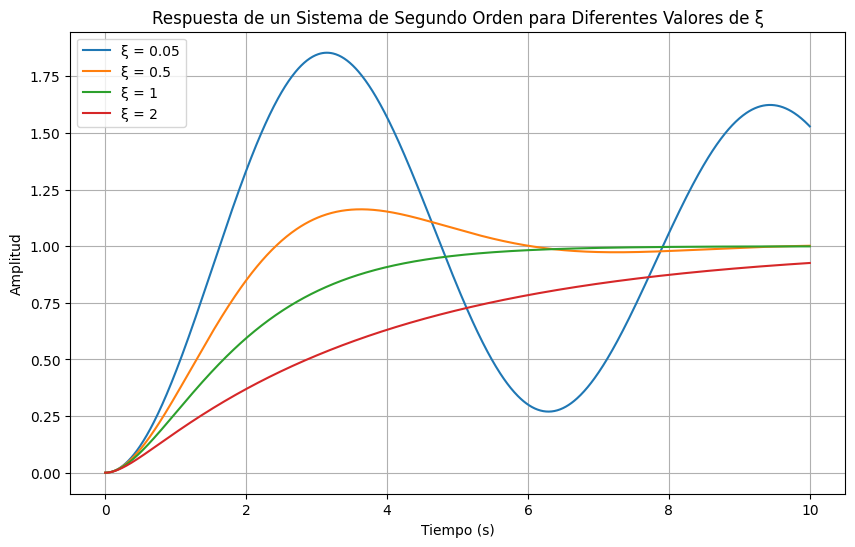

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Parámetros del sistema de segundo orden
omega_n = 1  # Frecuencia natural (rad/s)

# Valores de ξ para diferentes escenarios
xi_values = [0.05, 0.5, 1, 2]  # Valores pequeños, normales y grandes

# Tiempo de simulación
t = np.linspace(0, 10, 1000)

# Generar las respuestas para cada valor de ξ
plt.figure(figsize=(10, 6))

for xi in xi_values:
    # Función de transferencia para el sistema de segundo orden
    system = ctrl.TransferFunction([omega_n**2], [1, 2*xi*omega_n, omega_n**2])
    time, response = ctrl.step_response(system, t)

    plt.plot(time, response, label=f'ξ = {xi}')

# Personalizar la gráfica
plt.title('Respuesta de un Sistema de Segundo Orden para Diferentes Valores de ξ')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()




El análisis de la respuesta transitoria de un sistema de segundo orden frente a distintos valores del coeficiente de amortiguamiento (ξ) evidencia cómo este parámetro influye directamente en el comportamiento dinámico del sistema. A medida que ξ aumenta, la respuesta se vuelve más amortiguada, lo que se traduce en una menor presencia de oscilaciones, aunque con una respuesta más lenta. Por el contrario, cuando ξ disminuye, se observa una mayor tendencia a oscilar, con sobreimpulsos más marcados antes de alcanzar la estabilidad.

Este comportamiento confirma que el coeficiente de amortiguamiento regula tanto la velocidad de respuesta como la cantidad de oscilaciones durante el régimen transitorio, estableciendo una relación directa entre ξ, la estabilidad del sistema y la calidad de su desempeño ante perturbaciones o cambios en la entrada.
